### Libraries import

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os

In [163]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)

### Read Dataset

In [115]:
## read_csv file
Spotify_YT = pd.read_csv(r"data\Spotify_Youtube.csv")

### Data Cleaning

In [116]:
Spotify_YT.shape

(20718, 28)

In [117]:
Spotify_YT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

### Basic Statistics

- Data is at artist per song level

In [128]:
Spotify_YT.shape

(20718, 28)

In [126]:
Spotify_YT.isnull().sum()

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
                 ... 
Comments          569
Description       876
Licensed          470
official_video    470
Stream            576
Length: 28, dtype: int64

In [130]:
## treat string missing values
Spotify_YT.loc[Spotify_YT["Url_youtube"].isnull(), "Url_youtube"] = 'NA'
Spotify_YT.loc[Spotify_YT["Title"].isnull(), "Title"] = 'NA'
Spotify_YT.loc[Spotify_YT["Channel"].isnull(), "Channel"] = 'NA'
Spotify_YT.loc[Spotify_YT["Description"].isnull(), "Description"] = 'NA'
Spotify_YT.loc[Spotify_YT["Licensed"].isnull(), "Licensed"] = 'NA'
Spotify_YT.loc[Spotify_YT["official_video"].isnull(), "official_video"] = 'NA'

In [198]:
## treat numeric missing values
Spotify_YT.loc[Spotify_YT["Views"].isnull(), "Views"] = round(Spotify_YT["Views"].mean(),0)
Spotify_YT.loc[Spotify_YT["Likes"].isnull(), "Likes"] = round(Spotify_YT["Likes"].mean(),0)
Spotify_YT.loc[Spotify_YT["Comments"].isnull(), "Comments"] = round(Spotify_YT["Comments"].mean(),0)
Spotify_YT.loc[Spotify_YT["Stream"].isnull(), "Stream"] = round(Spotify_YT["Stream"].mean(),0)
Spotify_YT["Key"] = Spotify_YT["Key"].astype("string")

In [199]:
## Remove Unnecessary Columns
Spotify_YT.drop(columns=["Unnamed: 0"], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [200]:
Spotify_YT.describe().T

,count,mean,std,min,25%,50%,75%,max
Danceability,20716.00,0.62,0.17,0.00,0.52,0.64,0.74,0.97
Energy,20716.00,0.64,0.21,0.00,0.51,0.67,0.80,1.00
Loudness,20716.00,-7.67,4.63,-46.25,-8.86,-6.54,-4.93,0.92
Speechiness,20716.00,0.10,0.11,0.00,0.04,0.05,0.10,0.96
Acousticness,20716.00,0.29,0.29,0.00,0.05,0.19,0.48,1.00
...,...,...,...,...,...,...,...,...
Duration_ms,20716.00,224717.58,124790.54,30985.00,180009.50,213284.50,252443.00,4676058.00
Views,20718.00,93937821.13,271511065.00,0.00,1950563.25,15724011.50,77983789.25,8079649362.00
Likes,20718.00,663341.06,1765806.65,0.00,23021.75,135455.50,589749.75,50788652.00
Comments,20718.00,27518.99,190562.58,0.00,542.00,3571.50,16470.00,16083138.00


In [201]:
## Nuber of Songs
song_cnt = pd.DataFrame({"Songs":[Spotify_YT["Uri"].nunique()], "Artists":[Spotify_YT["Url_spotify"].nunique()]})
song_cnt

,Songs,Artists
0,18862,2079


In [202]:
## Top 10 most Streamed song
Spotify_YT.groupby(by = ["Track", "Uri"], as_index = False)["Stream"].max().sort_values(by = ["Stream"], ascending=False).head(10)

,Track,Uri,Stream
2108,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,3386520288.00
13928,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,3362005201.00
14482,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,2634013335.00
18610,rockstar (feat. 21 Savage),spotify:track:0e7ipj03S05BNilyu5bRzt,2594926619.00
14952,Sunflower - Spider-Man: Into the Spider-Verse,spotify:track:0RiRZpuVRbi7oqRdSMwhQY,2538329799.00
11584,One Dance,spotify:track:1zi7xx7UVEFkmKfv06H8x0,2522431995.00
3095,Closer,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,2456205158.00
1880,Believer,spotify:track:0pqnGHJpmpxLKifKRmU6WP,2369272335.00
13452,STAY (with Justin Bieber),spotify:track:567e29TDzLwZwfDuEpGTwo,2365777505.00
13900,Señorita,spotify:track:6v3KW9xbzN5yKLt9YKDYA2,2336219850.00


In [203]:
## Top 10 most viewed youtube video
Channel_wise_views = Spotify_YT.groupby(by = ["Track", "Uri","Channel"], as_index=False)["Views"].max()
Track_Wise_views = Spotify_YT.groupby(by = ["Track", "Uri"], as_index=False)["Views"].sum()
Track_Wise_views.groupby(by = ["Track", "Uri"], as_index = False)["Views"].max().sort_values(by = ["Views"], ascending=False).head(10)

,Track,Uri,Views
3952,Despacito,spotify:track:6habFhsOp2NvshLv26DqMb,16159296273.00
13762,See You Again (feat. Charlie Puth),spotify:track:2JzZzZUQj3Qff7wapcbKjc,11547595554.00
8843,Lean On,spotify:track:1Lim1Py7xBgbAkAys3AGAG,9974504694.00
13928,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,5908398479.00
2644,Calma - Remix,spotify:track:4U0JLGFHJpEnDS5w8F7ngE,5322011392.00
16148,This Is What You Came For,spotify:track:0azC730Exh71aQlOt9Zj3y,5252059812.00
15042,Swalla (feat. Nicki Minaj & Ty Dolla $ign),spotify:track:6kex4EBAj0WHXDKZMEJaaF,5162403752.00
17635,Wheels on the Bus,spotify:track:6YQ7aPJhk0MGpwoKfFAEbS,4898831101.00
15275,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",spotify:track:4w8niZpiMy6qz1mntFA5uM,4828403435.00
16944,Uptown Funk (feat. Bruno Mars),spotify:track:32OlwWuMpZ6b0aN2RZOeMS,4821016218.00


In [204]:
Float_col = []
Object_col = []

## To find Float and Object Columns
for col in Spotify_YT.columns:
    if Spotify_YT[col].dtypes == "float64":
        Float_col.append(col)
    elif Spotify_YT[col].dtypes == "object":
        Object_col.append(col)

In [262]:
Float_col

['Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Views',
 'Likes',
 'Comments',
 'Stream']

### Univariate Analysis
- Views, Comments, Likes have right skewed distribution
- Dataset is mostly of Songs, since, speechiness has been low.
- Songs have been generally vocal except for the few.
- Recorded songs have been more popular. As we can see from the Speechiness distribution.

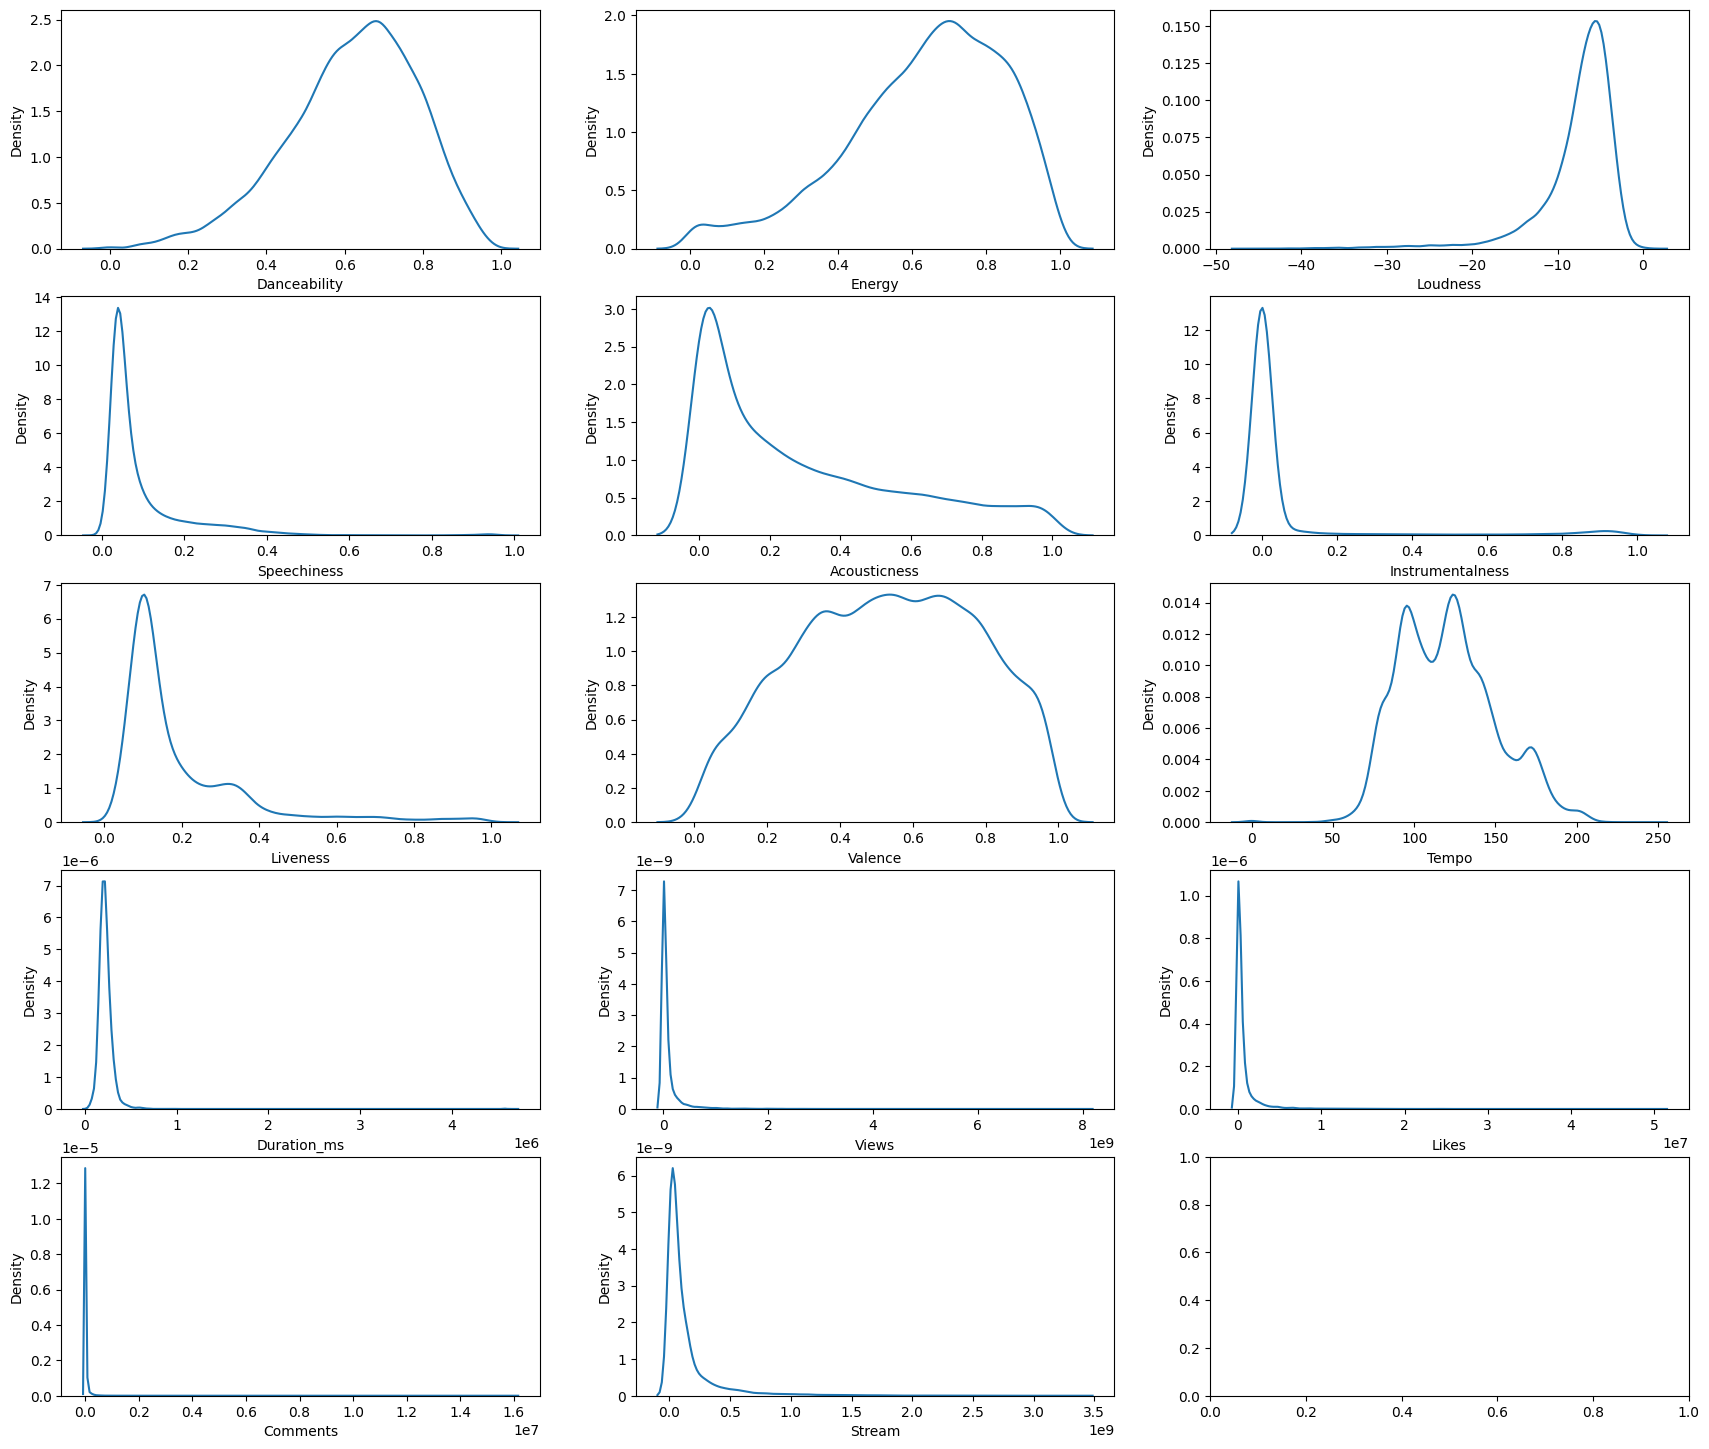

In [242]:
## Distibution of columns
fig, axs = plt.subplots(nrows=5, ncols = 3, figsize = (21,18))
for i in range(len(Float_col)):
    row = i//3
    col = i%3
    sns.kdeplot(Spotify_YT[Float_col[i]], ax=axs[row,col])
plt.show()

In [243]:
right_skewed = ["Stream", "Comments", "Likes", "Views", "Duration_ms", "Speechiness", "Liveness", "Instrumentalness"]
left_skewed = ["Loudness"]

### Bivariate Analysis

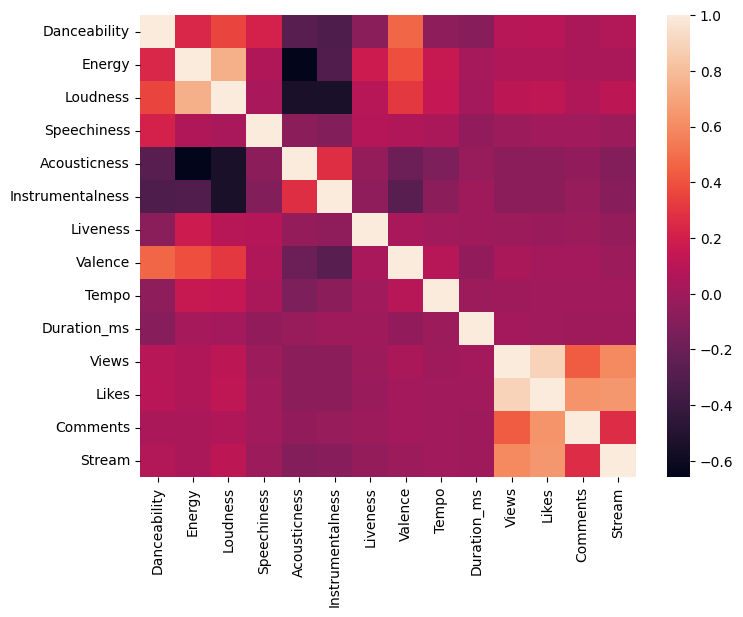

In [244]:
## Correlation without transformation
fig, axs = plt.subplots(nrows=1, ncols = 1, figsize = (8,6))
sns.heatmap(Spotify_YT[Float_col].corr(method="pearson"), ax = axs)
plt.show()

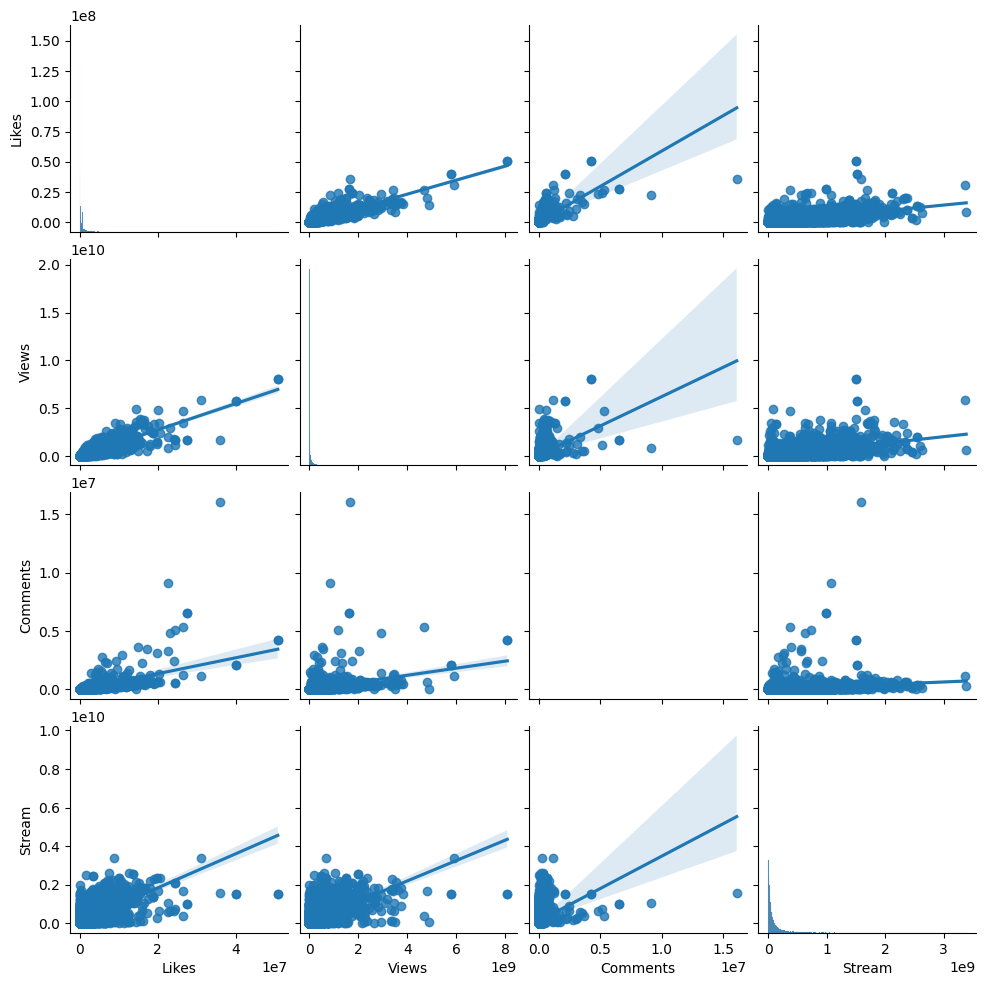

In [222]:
sns.pairplot(Spotify_YT[["Likes", "Views", "Comments", "Stream"]], kind="reg")
plt.show()

In [215]:
song_features = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]

### Relationship between Song features and their Streams

- More Danceable, Energetic songs have higher streams.
- As speechiness, Liveliness, Loudness decreases stream increases
- Tempo and Valence should neither be too high nor too low.
- Lower Acoustic track have more streams

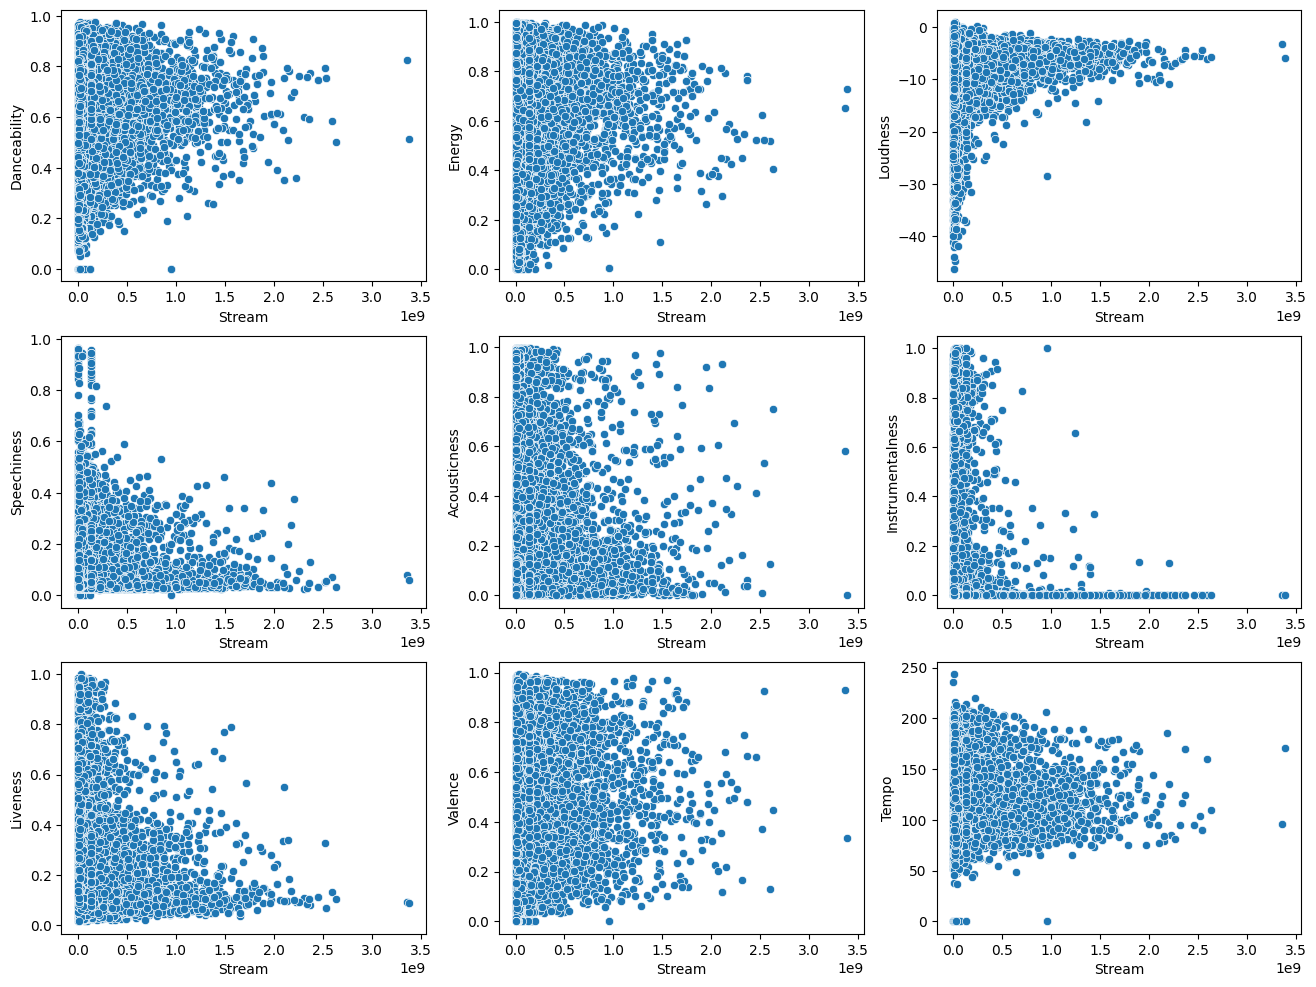

In [221]:
fig, axs =  plt.subplots(nrows=3, ncols = 3, figsize=(16,12))
for i in range(len(song_features)):
    row = i//3
    col = i%3
    sns.scatterplot(data=Spotify_YT, x = "Stream", y = song_features[i], ax = axs[row, col])
plt.show()

- Views behaves similarly as to the stream except for the Valence. As valence increase in the tracks, views increses

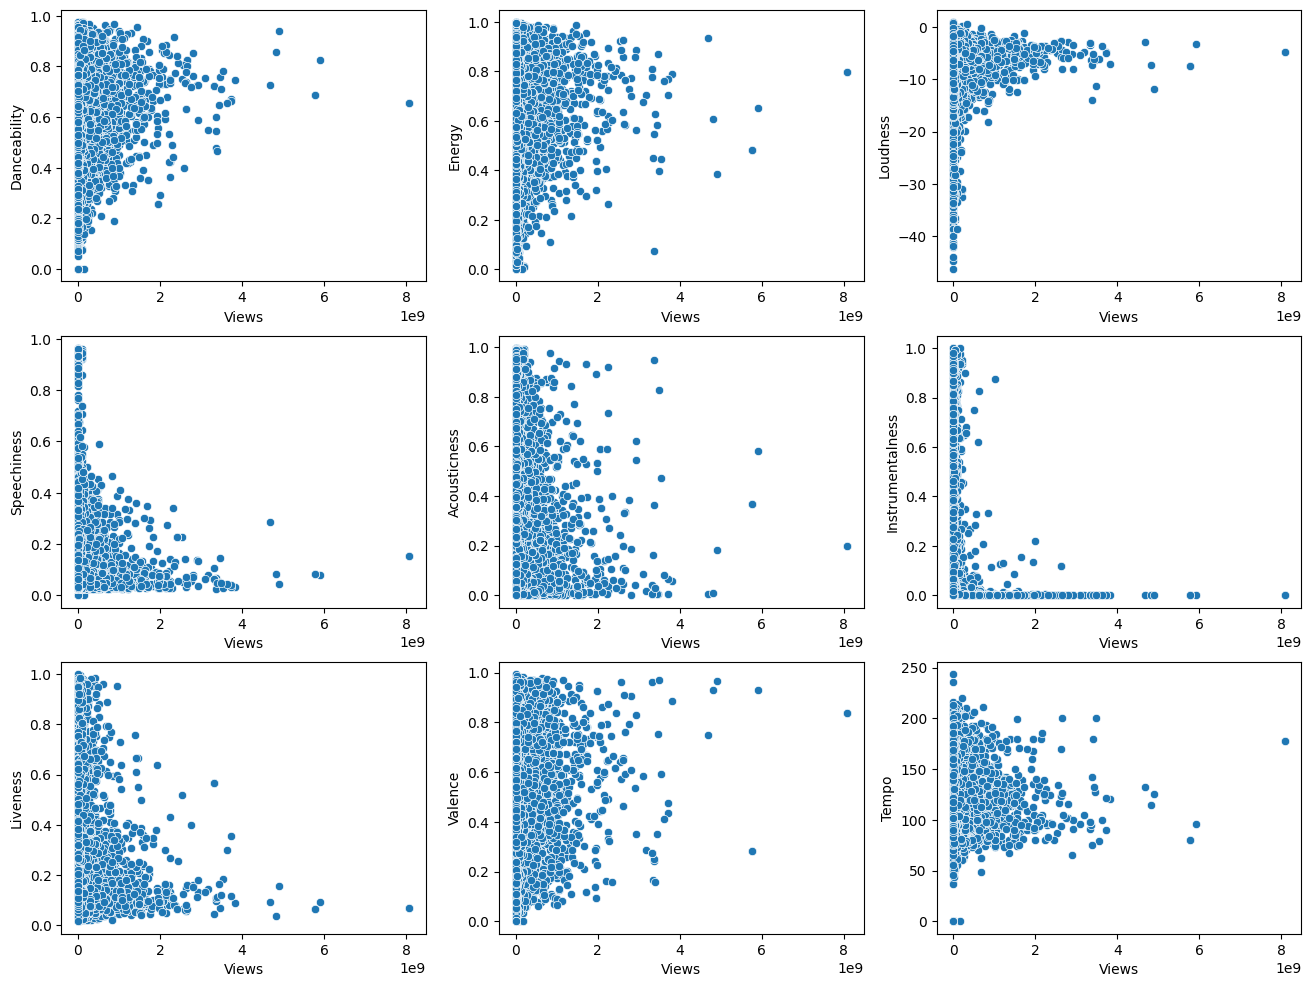

In [225]:
fig, axs =  plt.subplots(nrows=3, ncols = 3, figsize=(16,12))
for i in range(len(song_features)):
    row = i//3
    col = i%3
    sns.scatterplot(data=Spotify_YT, x = "Views", y = song_features[i], ax = axs[row, col])
plt.show()

## Correlation after transformation

- After transformation Musical features shows uniform distribution with views and streams. So, i don't think we have captured relationship between the variables correctly

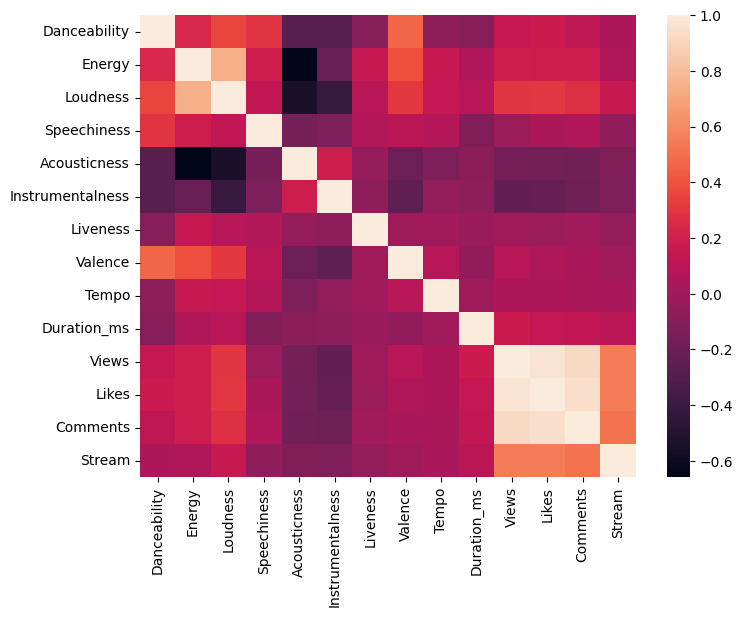

In [253]:
## Correlation after transformation
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (8,6))
Float_var_dat = Spotify_YT[Float_col]
for i in right_skewed:
    Float_var_dat[i] = np.log(Float_var_dat[i])
sns.heatmap(Float_var_dat.corr(method="pearson"), ax = axs)
plt.show()

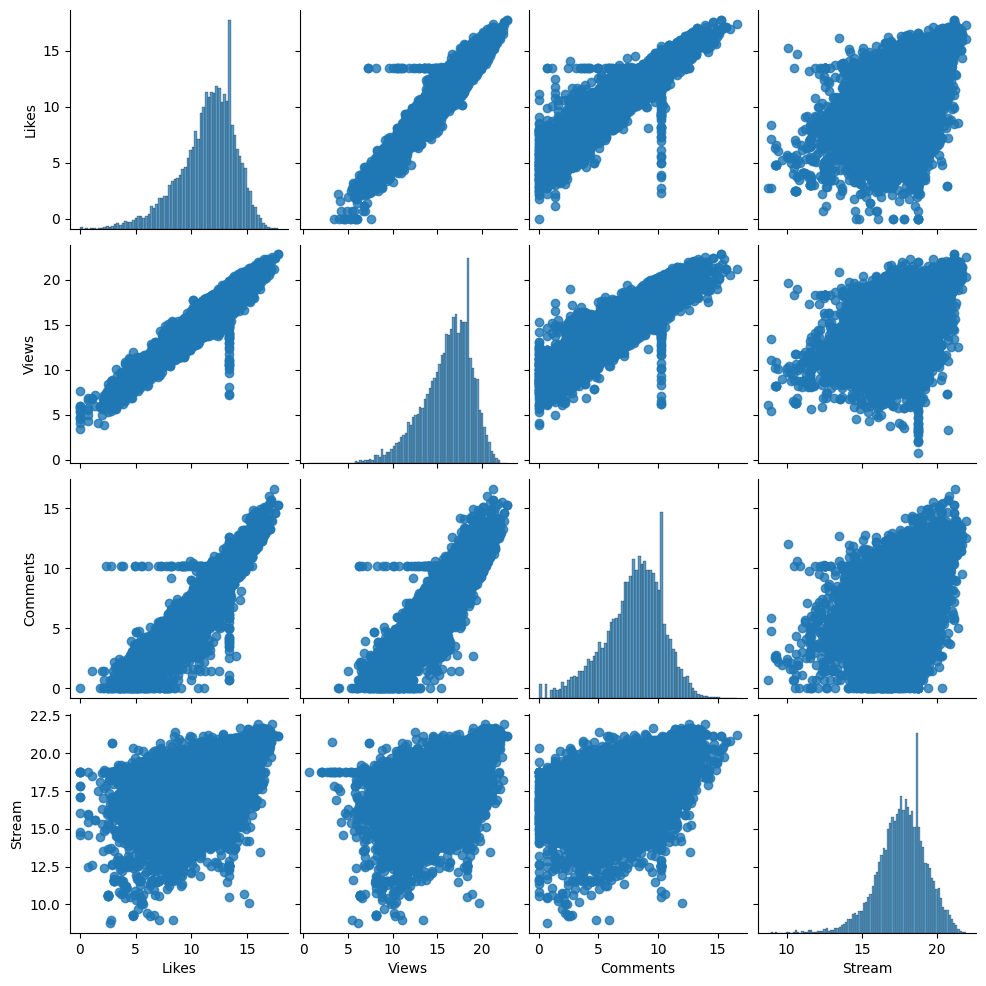

In [254]:
## Comments, Likes and Views have multiplicative relationship
sns.pairplot(Float_var_dat[["Likes", "Views", "Comments", "Stream"]], kind="reg")
plt.show()

<Axes: >

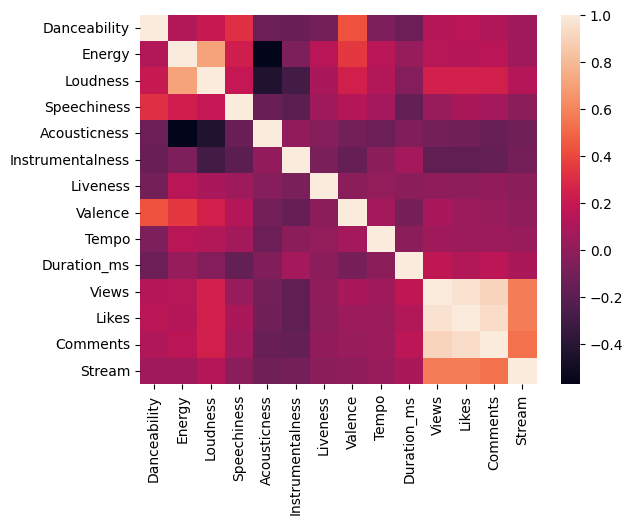

In [259]:
sns.heatmap(Spotify_YT[Float_col].corr(method="spearman"))